## 1.분할

- 구축형 데이터로 모형을 생성하고 테스트 데이터로 얼마나 적합한지 판단
- 구축형은 50%(추정용), 검정용(30%), 시험용(20%)로 사용

#### 데이터의 양이 충분하지 않거나 입력 변수에 대한 설명이 충분한 경우


- 구축용과 시험용으로 분리하여 사용하거나 교차확인을 통해 모형 평가

### 1.1 Scaling

- 목적 : Overflow, UnderFlow 방지, 최적화 안정성 및 수렴 속도 향상

### 1) Standard Scaler
- 평균 제외하고 표준편차를 나누어 변환
- 각 변수가 정규분포를 따른다는 가정이기에 정규분포가 아닐시에 최선이 아닐 수 있다.

### 2) Min-Max Scaler

- 가장 많이 활용되는 알고리즘(0~1, -1~1 사이 값으로 변환)
- 분포의 모형을 그대로 지켜주며 각 변수가 정규분포가 아니거나 표준편차가 매우 작을 때 효과적
- 이상치에 취약, 표준편차가 커지면 취약

### 3) Robust Scaler

- MinMax와 유사하지만 최소 최대 대신에 IQR 중 25%/75%값을 사용하여 변환
- 이상치에 영향 최소화하였기에 이상치가 있는 데이터에 효과적이고 적은 데이터에도 효과적

## 2. 의사결정나무 분석

### 2-1 분류분석

- 분류분석은 클러스터링과 유사하지만, 분류분석은 각 그룹이 정의되어 있다.
- 교사학습에 해당

#### 분류 기법

- 로지스틱 회귀분석, 의사결정나무, CART, 베이지안분류, 인공신경망, SVM, KNN, 규칙기반의 분류와 사례기반추론

### 2-2 의사결정나무
- 분류 함수를 의사결정 규칙으로 이루어진 나무 모양으로 그리는 방법

#### 활용

- 세분화
- 분류
- 예측
- 차원축소 및 변수선택 : 매우 많은 수의 예측변수 중에서 목표변수에 큰 영향을 미치는 변수들을 골라내고자 하는 경우
- 교호작용효과의 파악 : 여러 개의 예측변수들을 결합하여 목표변수에 작용하는 규칙 파악하고 할 때
- 범주의 병합 또는 연속형 변수의 이산화 

#### 특징 
- 결과 누구에게나 설명하기 용이
- 모형 만드는 방법이 계산적으로 복잡하지 않고 대용량 데이터에서도 빠르게 만들 수 있다.
- 상관성이 높은 다른 불필요한 변수가 있어도 크게 영향 x
- 모형 분류 정확도 높다

In [11]:
iris = load_iris()

In [12]:
y = pd.DataFrame(load_iris().target,columns=['target'])

In [13]:
iris = pd.DataFrame(iris.data,columns=iris.feature_names)

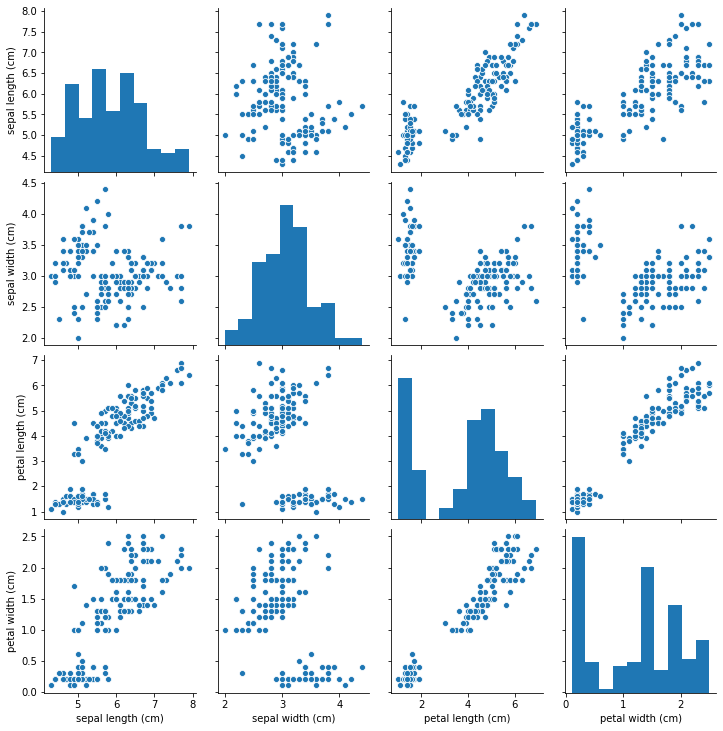

In [6]:
sns.pairplot(iris,diag_kind='hist')

In [31]:
clf = DecisionTreeClassifier()

In [32]:
clf_fit = clf.fit(iris,y)

In [48]:
dot_data = export_graphviz(clf_fit,out_file=None, feature_names=iris.columns,
               class_names=load_iris().target_names,rounded=True,special_characters=True,filled = True)

graph = graphviz.Source(dot_data)

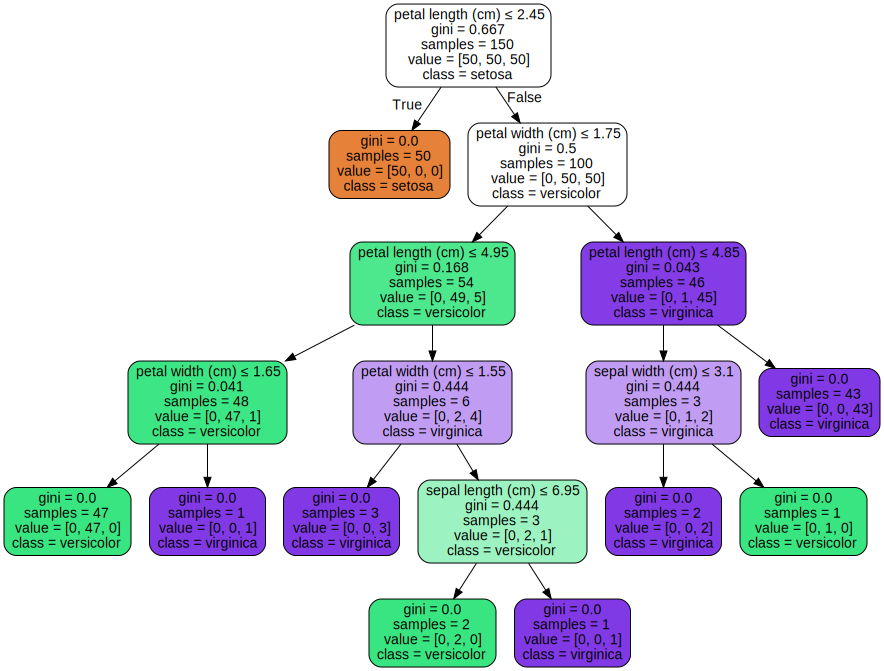

In [49]:
graph

In [50]:
clf2 = DecisionTreeClassifier(criterion='entropy')

In [51]:
clf2_fit = clf2.fit(iris,y)

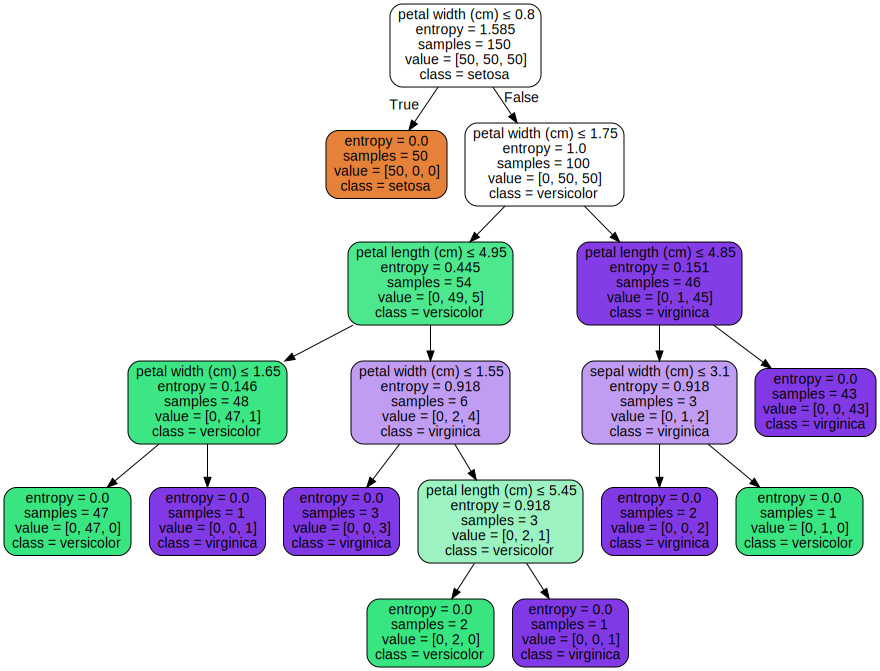

In [52]:
dot_data = export_graphviz(clf2_fit,out_file=None, feature_names=iris.columns,
               class_names=load_iris().target_names,rounded=True,special_characters=True,filled = True)

graph2 = graphviz.Source(dot_data)
graph2

- criterion의 default 값은 gini, 즉 결정기준의 default 값이 gini이다.

### 가지치기(Pruning)

1) 가지치기의 경우 max_depth를 통해 구현할 수 있다.(올바른 방법은 아님)

2) 가지치기의 경우 사전가지치기(트리 생성 일찍 중단하는 방법), 사후가지치기(트리 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 방법)

3) 사전가지치기는 트리의 최대 깊이나 리프의 최대 개수를 제한하거나 노드가 분할하기 위한 포인트의 최소 개수 지정(scikit-learn은 사전 가지치기만 지원)



#### 가지치기 진행하는 방법

1) 지니계수/엔트로피와 같은 Information Gain의 값이 일정 수준 이하로 안내려가도록

2) 가지의 개수 자체를 제한하는 방법

3) 이 실습과 같이 깊이를 제한하는 방법

### 파라미터
- min_samples_split : 노드를 분할하기 위한 최소 샘플 수
- min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플 데이터 수
- max_features : 최대 피처 개수, None이 디폴트로 모든 피처 사용
- max_depth : 트리의 최대 깊이
- max_leaf_nodes : 리프 노드의 최대 개수

### Feature Importance

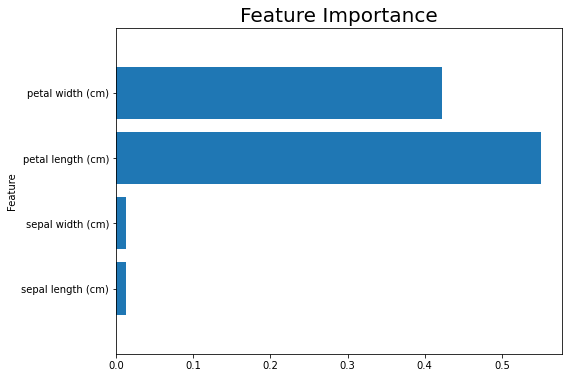

In [66]:
plt.figure(figsize=(8,6))
plt.barh(range(len(iris.columns)),clf.feature_importances_,align = 'center')
plt.yticks(np.arange(len(iris.columns)),iris.columns)
plt.title("Feature Importance",fontsize = 20)
plt.ylabel("Feature")
plt.ylim(-1,len(iris.columns))
plt.show()

In [71]:
feature_df = pd.DataFrame(clf2.feature_importances_,columns=['feature_importance'])
feature_df['label'] = iris.columns
feature_df.sort_values(by='feature_importance',inplace = True)

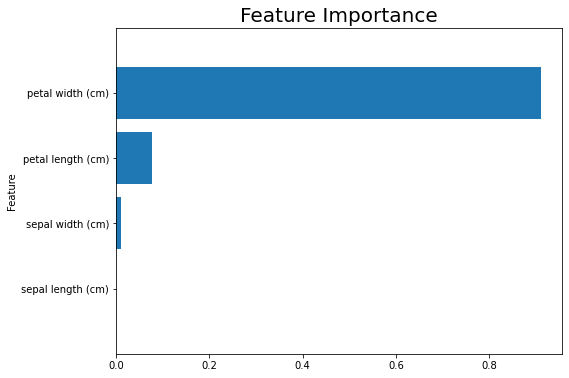

In [81]:
plt.figure(figsize=(8,6))
plt.barh(range(len(feature_df)),feature_df['feature_importance'].to_list(),align = 'center')
plt.yticks(np.arange(len(feature_df)),feature_df['label'].to_list())
plt.title("Feature Importance",fontsize = 20)
plt.ylabel("Feature")
plt.ylim(-1,len(feature_df))
plt.show()

#### 지니계수를 결정기준으로 썼을 때

In [83]:
confusion_matrix(y,clf.predict(iris))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

#### 엔트로피를 결정기준으로 썼을 때

In [84]:
confusion_matrix(y, clf2.predict(iris))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [94]:
X_train.shape

(112, 4)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(iris     #feature 
                                                    , y     #target
                                                    , stratify = y #층화추출법
                                                    , random_state = 1)  

In [114]:
y_train.value_counts()

target
0         38
1         37
2         37
dtype: int64

- shuffle =  True는 무작위추출
- stratify = 원하는 것 하면 원하는 것을 층화추출해준다.

- 층화추출법 : 각 계층을 고루 대표할 수 있도록 표본을 추출하는 방법(stratify)
- 단순랜덤추출법 : 임의의 n개를 추출하는 방법
- 계통추출법 : K개씩 n개의 구간으로 나누고 첫 구간에서 하나를 임의로 선택한 후 K개씩 띄어서 표본선택
- 집락추출법 : 군집 구분하고 군집별로 단순랜덤추출법을 한 후 모든 자료를 활요하거나 샘플링하는 방법

In [93]:
from sklearn.model_selection import StratifiedShuffleSplit

In [98]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=1)

In [100]:
train = pd.concat([iris,y],axis = 1)

In [115]:
for train_idx,test_idx in split.split(train,y) :
    X_train = train.loc[train_idx].iloc[:,:-1]
    X_test = train.loc[test_idx].iloc[:,:-1]
    y_train = y.loc[train_idx]
    y_test = y.loc[test_idx]

In [116]:
y_train.value_counts()

target
0         38
1         37
2         37
dtype: int64

### 의사결정 회귀나무로 해보기

In [117]:
from sklearn.tree import DecisionTreeRegressor  

In [118]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()                        # sin함수의 예측을 목표로한다
y[::5] += 3 * (0.5 - rng.rand(16))  

In [122]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
regr1 = tree.DecisionTreeRegressor(max_depth = 2)
regr2 = tree.DecisionTreeRegressor(max_depth = 5)

In [123]:
regr1.fit(X,y)
regr2.fit(X,y)
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

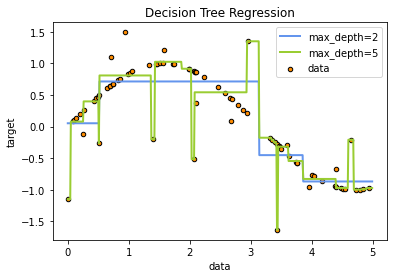

In [124]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 3. SVM

### 3-1. 분류
서포트 벡터 머신은 선형이나 비선형 분류, 회귀, 이상치 탐색에 사용할 수 있는 다목적 머신러닝 모델이다. 복잡한 분류 문제에 특히 유용하며 작거나 중간 크기의 데이터에 적합하다. 또한 서포트 벡터 머신은 비확률적 이진 선형 분류 모델을 생성한다.

**< 장점 >**

1) 분류와 예측에 모두 사용 가능하다.

2) 신경망 기법에 비해 과적합 정도가 낮다.

3) 예측의 정확도가 높다.

4) 저차원과 고차원의 데이터에 대해 모두 잘 작동한다.

**< 단점 >**

1) 전처리와 파라미터에 따라 정확도가 달라진다.

2) 예측이 어떻게 이루어지는지에 대한 이해와 모델에 대한 해석이 어렵다.

3) 대용량 데이터에 대한 모형 구축시 속도가 느리며 메모리 할당량이 크다.

**< 용어 >**

1) 초평면 : 각 그룹을 구분하는 분류자

2) 서포트 벡터 : 각 그룹에 속한 데이터 중에서도 초평면에 가장 가까이에 붙어있는 최전방 데이터들

3) 마진 : 서포트 벡터와 초평면 사이의 수직거리

선형 SVM 분류는 클래스 사이의 경계의 폭이 가장 넓은 기준선을 찾는 것으로 라지 마진 분류라고도 한다. 기준선 주변에 새로운 데이터를 추가해도 전혀 영향을 끼치지 않는다. 이런 샘플들을 서포트 벡터라고 한다.즉 SVM은 데이터들간의 벡터 거리를 측정했을 때 그 거리가 최대가 되는 분류자를 찾아나간다.

- SVM은 feature의 scaling에 민감하여 scaler 할 경우 결정 경계가 더 좋아진다.

모든 데이터가 경계선 바깥에 올바르게 분류 되어 있다면 하드 마진 분류라고 한다. 마진은 결정경계과 서포트 벡터 사이의 거리를 의미한다. 하드 마진 분류에서는 두가지 문제점이 존재한다.

- 데이터가 선형적으로 구분될 수 있어야 한다.
- 이상치에 민감하다.

이런 문제를 피하려면 클래스 간의 결정선을 넓게 유지하는 것과 마진 오류(샘플이 결정선 중간이나 반대쪽에 있는 경우) 사이에 적절한 균형을 잡아야 하는데 이를 소프트 마진 분류라고 한다.

SVM 모델은 C 파라미터를 사용해 이 균형을 조절한다. C 값을 줄이면 결정선의 폭이 넓어지지만 마진 오류도 커진다.(C값을 크게 잡아주어 마진값은 작더라도 데이터셋을 정확히 분류할 수 있다.)

선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만 선형적으로 분류할 수 없는 데이터셋이 많다. 비선형 데이터를 다루는 방법은 다항 특성과 같은 특성을 추가하는 것이다.

다항식 특성을 추가하는 것은 간단하고 대부분 머신러닝 알고리즘에서 잘 작동하지만 낮은 차수는 복잡한 데이터를 잘 표현하지 못하고 높은 차수는 모델의 과적합이나 속도를 느리게 만든다.

이 때 SVM은 커널 트릭을 사용해 실제로 특성을 추가하지는 않지만 특성을 추가한 것과 같은 결과를 얻을 수 있다.

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것이다.

다항 특성 방식과 마찬가지로 커널 트릭을 사용해 유사도 특성을 추가할 수 있다.

- 대체적으로 LinearSVC가 SVC(kernel = 'linear') 보다 훨씬 빠르다. 훈련 데이터가 아주 크거나 특성 수가 많을 때 그렇고 훈련 데이터가 너무 크지 않다면 가우시안 RBF 커널을 시도하는 것도 좋다.

In [2]:
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)
data['target'] = load_breast_cancer().target

In [5]:
scaler =  StandardScaler()
scaler_df = pd.DataFrame(scaler.fit_transform(data.iloc[:,:-1]),columns=data.columns[:-1])
scaler_df['target'] = data['target']

In [213]:
X_train,X_test,y_train,y_test = train_test_split(scaler_df.iloc[:,:-1],scaler_df[['target']],
                                                test_size = 0.25, stratify = scaler_df['target'],random_state = 42)

In [8]:
sv = SVC(kernel='linear',C = 1000)
y_pred = sv.fit(X_train,y_train).predict(X_test)

### Feature Importance

In [81]:
feature_imp = pd.DataFrame(sv.coef_.tolist()[0],index =data.columns[:-1],columns=['Feature']).sort_values(by = 'Feature',ascending = False)

<AxesSubplot:xlabel='Feature'>

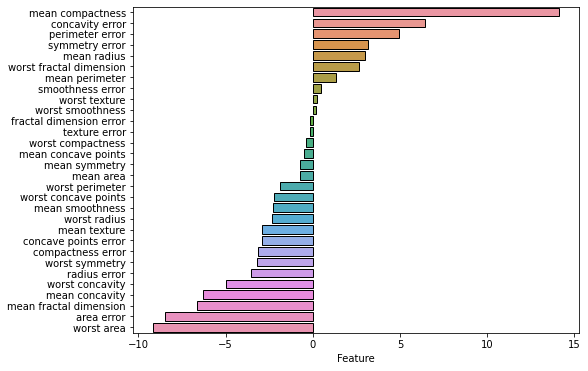

In [84]:
plt.figure(figsize = (8,6))
sns.barplot(y = feature_imp.index,x = feature_imp['Feature'],edgecolor = 'k')

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.97      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [89]:
roc_auc_score(y_test,y_pred)

0.9383647798742139

In [90]:
confusion_matrix(y_test,y_pred)

array([[50,  3],
       [ 6, 84]], dtype=int64)

In [246]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

In [247]:
def get_colors(y):
    return [data_colors[label] for label in y]

In [254]:
def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

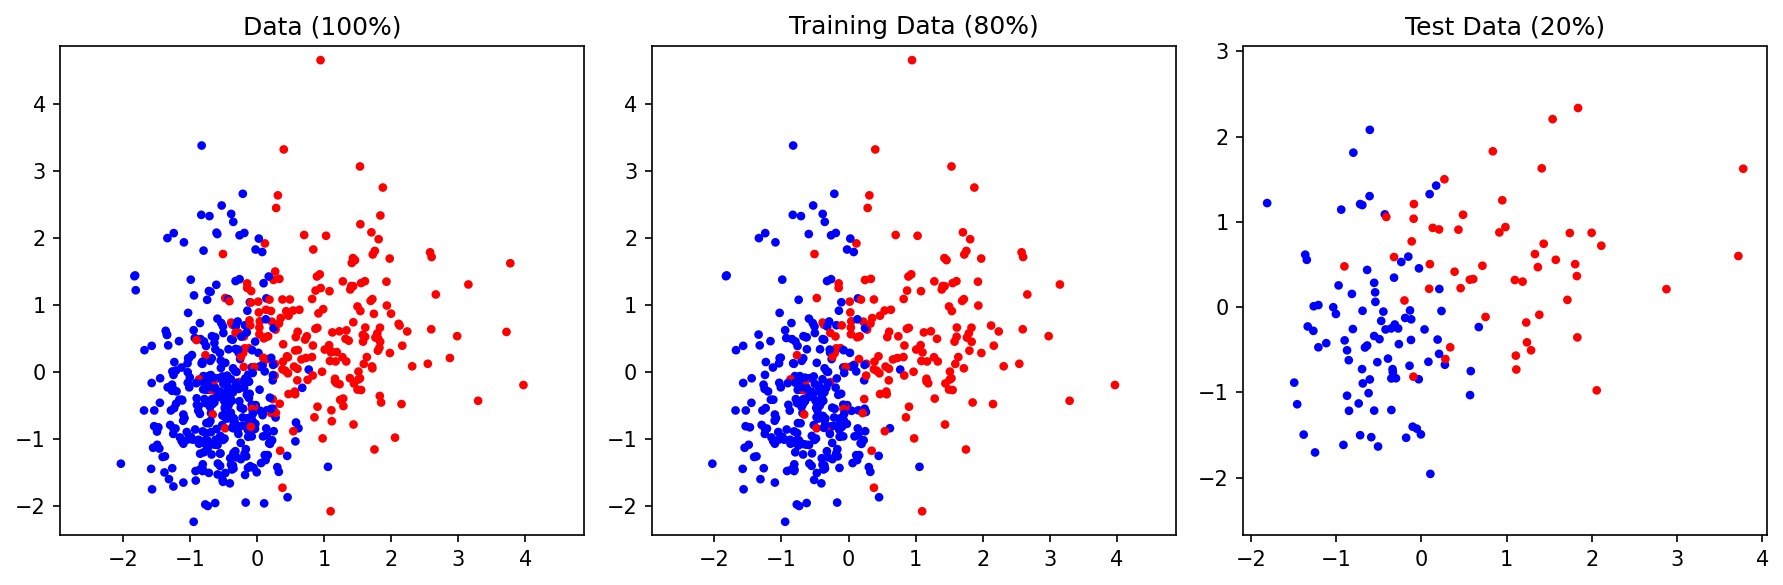

In [255]:
plot_data(X_train,y_train['target'].tolist(),X_test,y_test['target'].tolist())

In [256]:
def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()

In [309]:
sv.fit(X_train.iloc[:,:2],y_train)

SVC(C=1000, kernel='linear')

In [313]:
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = sv.decision_function(xy).reshape(XX.shape)

In [310]:
def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])

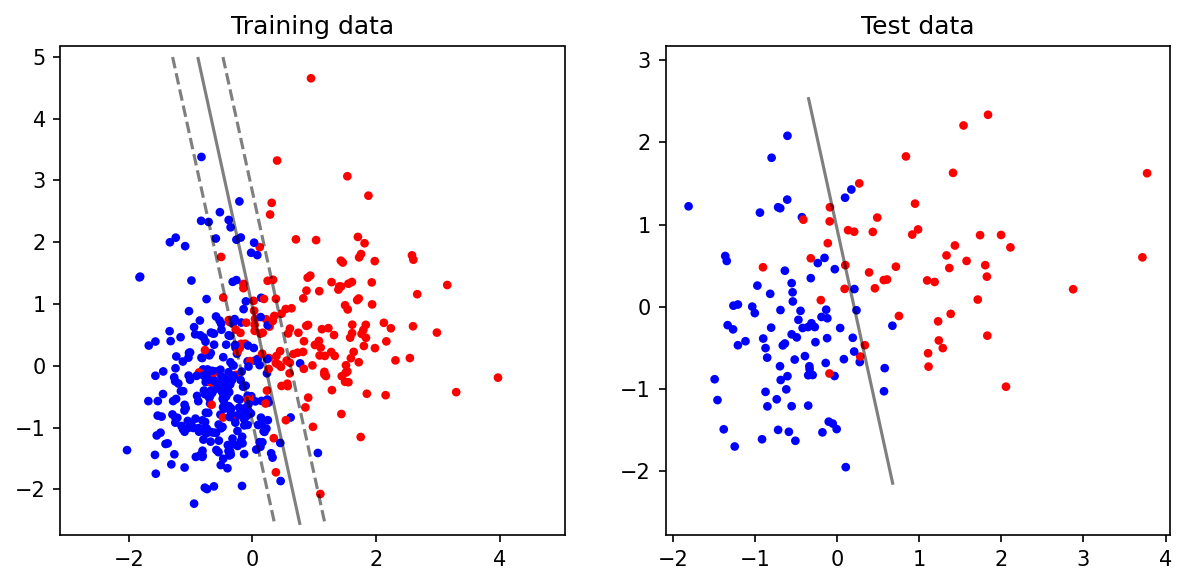

In [311]:
plot_decision_function(X_train,y_train['target'].tolist(),X_test,y_test['target'].tolist(),sv)

In [70]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [72]:
svc = SVC(kernel = 'linear',C = 1.0)

In [73]:
svc.fit(X_train.iloc[:,:2],y_train)

SVC(kernel='linear')

In [245]:
X0,X1= np.array(X_train.iloc[:,0]),np.array(X_train.iloc[:,1])
xx,yy = make_meshgrid(X0,X1)

Text(0.5, 1.0, 'SVC')

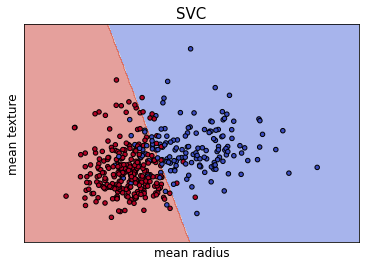

In [132]:
fig,sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plot_contours(sub,svc,xx,yy,cmap = plt.cm.coolwarm,alpha = 0.5)
sub.scatter(X0,X1,c = np.array(y_train['target']), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sub.set_xlim(xx.min(),xx.max())
sub.set_ylim(yy.min(),yy.max())
sub.set_xlabel(X_train.columns[0],size = 12)
sub.set_ylabel(X_train.columns[1],size = 12)
sub.set_xticks(())
sub.set_yticks(())
sub.set_title("SVC",size = 15)

## 4. RandomForest

- 의사결정나무의 특징인 분산이 크다는 점을 고려하여 배깅과 부스팅보다 더 많은 뭊작위성을 주어 약한 학습기들 생성 후 이를 선형 결합하여 최종 학습기를 만드는 방법
- 다양한 영역에서 높은 예측 성능을 보이고 있다.
- 결정 트리로서 쉽고 직관적인 장점 그대로 살리고 있다.
- 룰이 매우 명확하고 시각화 가능

#### 단점

- 하이퍼 파라미터가 너무 많고 튜닝을 위한 많은 시간이 소모

### 파라미터

- n_estimators : 결정트리 개수 지정(default = 10) 늘릴수록 좋은 성능이 나올 확률은 높지만 무조건은 아니며 학습 수행 시간이 오래걸린다는 것도 감안
- max_features : 트리를 분할하는 피처를 참조할 때 전체가 아니라 sqrt(전체 피처 개수)만큼 참조(ex 전체 피처가 16개라면 분할을 위해 4개 참조)
- max_depth or min_samples_leaf는 과적합 개선

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)

In [215]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [217]:
predict_rf = clf.predict(X_test)

In [218]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [219]:
accuracy_score(y_test,predict_rf)

0.958041958041958

Text(0.5, 1.0, 'RandomForest Feature Importance')

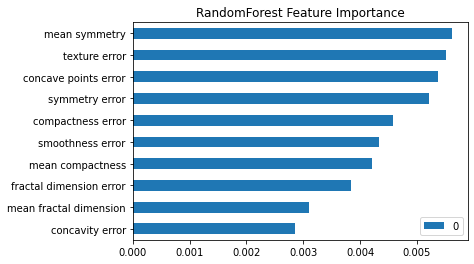

In [220]:
pd.DataFrame(clf.feature_importances_,index=X_train.columns).sort_values(by=0,ascending = True)[:10].plot.barh()
plt.title("RandomForest Feature Importance")

In [221]:
estimator = clf.estimators_[5]

In [233]:
export_graphviz(estimator,feature_names=X_train.columns,proportion=False,out_file='tree.dot',               class_names=np.array(y_train['target'].astype('str')),rounded=True, precision=2,filled=True)

In [234]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [235]:
from IPython.display import Image
Image(filename = 'tree.png')

In [237]:
marker_set = ['o', '^']

In [ ]:
fig,sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plot_contours(sub,svc,xx,yy,cmap = plt.cm.coolwarm,alpha = 0.5)
sub.scatter(X0,X1,c = np.array(y_train['target']), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sub.set_xlim(xx.min(),xx.max())
sub.set_ylim(yy.min(),yy.max())
sub.set_xlabel(X_train.columns[0],size = 12)
sub.set_ylabel(X_train.columns[1],size = 12)
sub.set_xticks(())
sub.set_yticks(())
sub.set_title("SVC",size = 15)

In [254]:
clf.fit(X_train.iloc[:,:2],y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [258]:
X0,X1 = X_train.iloc[:,0],X_train.iloc[:,1]
xx,yy = make_meshgrid(X0,X1)

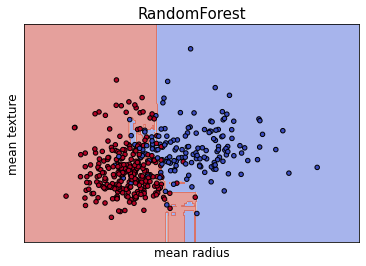

In [262]:
fig,sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plot_contours(sub,clf,xx,yy,cmap = plt.cm.coolwarm,alpha = 0.5)
sub.scatter(X0,X1,c = np.array(y_train['target']), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sub.set_xlim(xx.min(),xx.max())
sub.set_ylim(yy.min(),yy.max())
sub.set_xlabel(X_train.columns[0],size = 12)
sub.set_ylabel(X_train.columns[1],size = 12)
sub.set_xticks(())
sub.set_yticks(())
sub.set_title("RandomForest",size = 15)
plt.show()

## 5. Gradient Boosting Machine

- 여러 개의 약한 학습기를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식(대표적인 방식이 Ada, Gradient)


- 그 중에서 GBM은 가중치 업데이트를 경사 하강법을 이용한다. 정의된 손실 함수를 기준으로 오차를 계산하고 트리 기반의 약한 학습기를 만들어 오차를 줄일 수 있도록 가중치를 갱신하여 학습을 진행한다.

### 파라미터

- loss : 경사 하강법에 사용할 비용 함수 지정(default : 'deviance')
- learning_rate : 학습 진행 시 적용하는 학습률(default : 0.1). 너무 작은 값을 적용하면 최소 오류 값을 찾아 예측 성능이 높아지겠지만, 수행 시간이 너무 오래걸리고 또 너무 작게 설정하면 weak learner의 반복이 완료돼도 최소 오류 값 찾지 못할 수 있다. 이러한 특성으로 인해 n_estimators와 상호 보완적으로 조합해 사용한다. 
- n_estimators : weak_learner의 개수 지정.(개수가 많을수록 일정수준까지는 좋아질 것)
- subsample : 데이터 샘플링 비율이다. (0.5이면 학습 데이터 50%) 사용. 과적합이 염려되는 경우 1보다 작은 값으로 설정한다.

In [ ]:
iris = pd.concat([iris,y],axis = 1)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(iris.iloc[:,:-1],y,test_size = 0.3)

In [27]:
gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=123)

In [29]:
predict_gbc = gbc.predict(X_test)

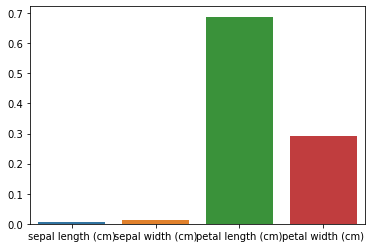

In [45]:
sns.barplot(iris.columns[:-1],gbc.feature_importances_)
plt.show()

In [30]:
print(classification_report(y_test,predict_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.95      0.92        19
           2       0.90      0.82      0.86        11

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



## 6. XGBoost

### 6-1. 장점

- 뛰어난 예측 성능, GBM 대비 빠른 수행시간, 과적합 규제, 나무 가지치기, 자체 내장된 교차검증, 결손값 자체 처리

### 6-2. 파라미터

**과적합 문제 시**

- eta 값 낮추기(n_estimators는 높이기)
- max_depth 값 낮추기
- min_child_weight 높이기
- gamma 높이기

In [46]:
xgb = XGBClassifier(random_state=123)
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob', random_state=123)

In [49]:
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.95      0.92        19
           2       0.90      0.82      0.86        11

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



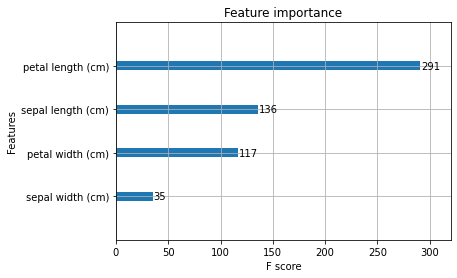

In [54]:
plot_importance(xgb)
plt.show()

<AxesSubplot:>

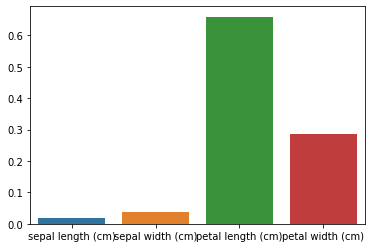

In [59]:
sns.barplot(iris.columns[:-1],xgb.feature_importances_)

## 7. LGBM

**장점**
- XGB보다 학습에 걸리는 시간이 훨씬 적다.
- 메모리 사용량도 상대적으로 적다.
- Category형 Feature 자동 변환과 최적 분할

**단점**
- 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다.

**특징**
- 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할 방식 사용

In [63]:
lgbm = LGBMClassifier(random_state=123)
lgbm.fit(X_train,y_train)
print(classification_report(y_test,lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      0.95      0.95        19
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



<AxesSubplot:>

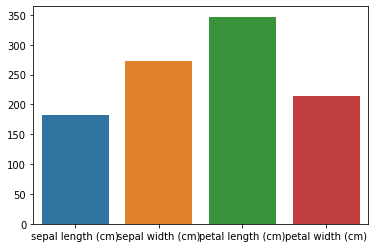

In [67]:
sns.barplot(iris.columns[:-1],lgbm.feature_importances_)

## 8. Naive Bayes

**장점**

- 간단하고 빠르며 효율적인 알고리즘이다.
- 잡음과 누락 데이터를 잘 처리한다.
- 훈련을 할 때 데이터의 크기에 상관 없이 잘 동작한다.
- 예측을 위한 추정 확률을 쉽게 얻을 수 있다.

**단점**

- 모든 특징이 동등하게 중요하고, 독립이라는 가정이 잘못된 경우가 자주 있다. (ex: 텍스트의 단어들, 일기예보를 할 때 습도와 같은 중요한 특징을 다른 특징과 동등하다 판단)
- 수치 특징이 많은 데이터셋에는 이상적이지 않다.
- 추정된 확률이 예측된 클래스보다 덜 신뢰할만하다.

In [69]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [73]:
from sklearn.inspection import permutation_importance

In [75]:
imps = permutation_importance(gnb,X_test,y_test)

<AxesSubplot:>

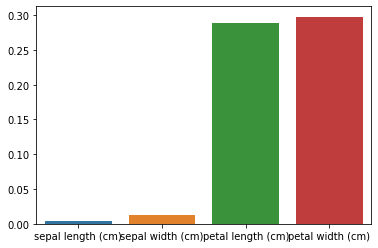

In [80]:
sns.barplot(X_test.columns,imps.importances_mean)


## 9. KNN
- KNN은 새로운 데이터의 클래스를 해당 데이터와 가장 가까운 k개 데이터들의 클래스로 결정한다. 유클리디안, 맨하탄, 민코우스키 등 다양한 거리 함수를 사용할 수 있고 대표적으로 유클리디안 거리를 사용한다.

- k의 선택은 일반적으로 훈련데이터의 개수의 제곱근으로 설정한다. 너무 크게 설정할 경우 클러스터링이 잘 이루어지지 않고 너무 작게할 경우 이상치 혹은 잡음 데이터와 이웃이 될 가능성이 있어 적절한 k의 선택이 중요하다.

**장점**
- 사용이 간단하다.
- 범주를 나눈 기준을 몰라도 데이터를 분류할 수 있다.
- 추가된 데이터의 처리가 용이하다.

**단점**
- k값의 결정이 어렵다.
- 비수치 데이터의 경우 유사도를 정의하기 어렵다.
- 이상치가 존재하면 성능에 큰 영향을 끼친다.

In [81]:
knnc = KNeighborsClassifier(metric= 'euclidean')
knnc.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

<AxesSubplot:>

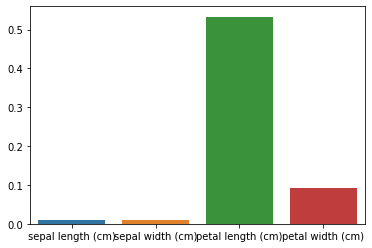

In [84]:
sns.barplot(X_test.columns,permutation_importance(knnc,X_test,y_test).importances_mean)

## 10.Voting

- Hard Voting : 다수결 원칙과 유사.
- Soft Voting : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

In [88]:
voting = VotingClassifier(estimators=[('lgbmc',lgbm),('xgbc',xgb),('gbmc',gbc)])
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lgbmc', LGBMClassifier(random_state=123)),
                             ('xgbc',
                              XGBClassifier(objective='multi:softprob',
                                            random_state=123)),
                             ('gbmc',
                              GradientBoostingClassifier(random_state=123))])

<AxesSubplot:>

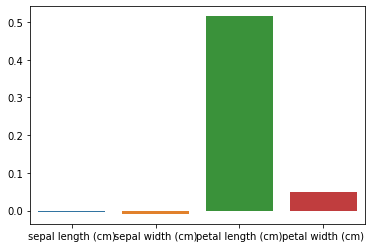

In [92]:
sns.barplot(X_test.columns,permutation_importance(voting,X_test,y_test).importances_mean)

## 11. Stacking

In [94]:
stack_estimator = [('lgbmc',lgbm),('gbmc',gbc)]

In [96]:
stacking = StackingClassifier(estimators=stack_estimator,final_estimator=xgb)

In [97]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('lgbmc', LGBMClassifier(random_state=123)),
                               ('gbmc',
                                GradientBoostingClassifier(random_state=123))],
                   final_estimator=XGBClassifier(objective='multi:softprob',
                                                 random_state=123))

<AxesSubplot:>

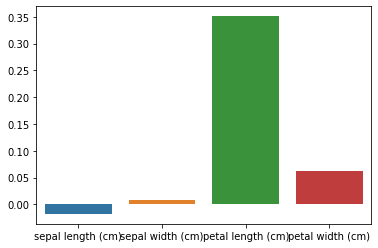

In [101]:
sns.barplot(X_test.columns,permutation_importance(stacking,X_test,y_test).importances_mean)

In [ ]:
for c in obj_cols[1:] :
    print(f'##### {c} #####')
    ct = pd.crosstab(data[c], data.Churn)
    chi_2, p, dof, expected = chi2_contingency(ct)
    print(f'{c}의 독립성 검정 결과 유의확률은 {p}이다. \n')

- 모든 변수가 통계적으로 독립성이 유의하기 때문에 더미화를 시킨후 진행한다.(0.05보다 작아야함)

In [ ]:
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(256,activation = 'relu',input_shape = [17]))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

input_shape는 칼럼 갯수

### Catboost

#### 장점

- 범주형 변수를 처리하는데 중점을 둔 알고리즘
- 기존 GBM기반 알고리즘들이 가지고 있는 target leakage 문제와 범주형 변수 처리문제를 해결한다.
- 기존의 GBM은 Overfitting에 취약한 문제점이 있었지만, Catboost는 Overfitting 방지

#### 단점

- 데이터 대부분이 수치형일 경우 위와같은 알고리즘이 큰 효과를 내기가 어렵습니다. 
- LGBM에 비해 학습 속도가 느리다.